<div class='bar_title'></div>

*Topics in Data Science 2*

# Deep Learning with Spatial Data

Gunther Gust / Justus Ameling<br>
Chair of Enterprise AI

Winter Semester 23/24

<img src="https://github.com/GuntherGust/tds2_data/blob/main/images/d3.png?raw=true" style="width:20%; float:left;" />

In this lecture we will learn how to load, manipulate, and visualize **spatial data**. Spatial data is present in every aspect of our lives and is therefore of great interest to data scientists.  Furthermore, we will dive into another task where deep learning can be helpful. The task of **image segmentation**. At the end of this notebook, you will see that the combination of spatial data and image segmentation can be useful and interesting.

## Table of Contents
1. Handling Spatial Data
2. Image Segmentation with Deep Learning
3. Deep Learning and Spatial Data

## Handling Spatial Data
### Loading Spatial Data

Two packages we'll use today to load and manipulate spatial data are `geopandas` and `osmnx`. Geopandas is a package that extends the functionality of Pandas to geospatial data, and Osmnx is a package that allows us to download and work with OpenStreetMap data.

In [1]:
#!pip install osmnx #use this command to install osmnx in colab
import geopandas as gpd
import osmnx as ox

### Datasets

To better understand the different packages we will first load different datasets.

#### Cities


*This dataset is derived from `arribas2019building`, which proposes a machine learning algorithm to delineate city boundaries from building footprints.*


First we will use a polygon geography. We will use an open dataset that contains the boundaries of Spanish cities. We can read it into an object named `cities` by:

In [2]:
cities = gpd.read_file("https://raw.githubusercontent.com/GuntherGust/sc_gdsa_data/main/spanish_cities.gpkg")

`geopandas.read_file()` supports a wide range of geospatial file formats. Some of the common geospatial file formats that `geopandas.read_file()` can handle include:

- Shapefiles (.shp)
- GeoJSON (.geojson)
- GeoPackage (.gpkg)
- KML (.kml)
- ESRI File Geodatabase (.gdb)
- MapInfo TAB (.tab)
- TopoJSON (.topojson)
- Comma-Separated Values (CSV) with geometry information
- ...


#### Streets

*This dataset froms of a project called "Las calles de las mujeres", a community-driven initiative exploring the extent to which streets are named after women.*

*Check out more about the project, including an interactive map at:
> [https://geochicasosm.github.io/lascallesdelasmujeres/](https://geochicasosm.github.io/lascallesdelasmujeres/)


And you can read it into an object called `streets` with:

In [3]:
streets = gpd.read_file("https://raw.githubusercontent.com/GuntherGust/sc_gdsa_data/main/final_tile.geojson")

#### Bars

The final dataset we will rely on is a set of points demarcating the location of bars in Madrid. To obtain it, we will use `osmnx`, a Python library that allows us to query [OpenStreetMap](https://www.openstreetmap.org). Note that we use the method `features_from_place`, which queries for points of interest (POIs, or `pois`) in a particular place (Madrid in this case). In addition, we can specify a set of tags to delimit the query. We use this to ask _only_ for amenities of the type "bar":

If you want to find more information about a location, you can scrape the osm database using different keywords. For example, [here](https://wiki.openstreetmap.org/wiki/Key:amenity) you can find all the keywords for the amenity category. But there are also categories like [natural](https://wiki.openstreetmap.org/wiki/Key:natural) and [leisure](https://wiki.openstreetmap.org/wiki/Key:leisure) and many more.

In [4]:
pois = ox.features_from_place(
    "Madrid, Spain", tags={"amenity": "bar"}
)

You do not need to know at this point what happens behind the scenes when we run `features_from_place` but, if you are curious, we are making a query to [OpenStreetMap](https://www.openstreetmap.org) (almost as if you typed "bars in Madrid, Spain" within Google Maps) and getting the response as a table of data, instead of as a website with an interactive map. Pretty cool, huh?

### Inspecting and plotting spatial data

The most direct way to get from a file to a quick visualization of the data is by loading it as a `GeoDataFrame` and calling the `plot` command. The main library employed for all of this is `geopandas` which is a geospatial extension of the `pandas` library, already introduced before. `geopandas` supports the same functionality that `pandas` does, plus a wide range of spatial extensions that make manipulation and general "munging" of spatial data similar to non-spatial tables.

Most GIS data is represented as one of three types of geometry, each consisting of one or more coordinates. These are `Polygons`, `Lines` and `Points`. We will now look at each of these.

#### Polygons

The first geometric shape we will look at is the polygon. Polygons always consist of several coordinates and form a shape. For example, our cities `GeoDataFrame` have such shapes. Polygons represent for example houses or larger areas.

In [5]:
cities.head()

,city_id,n_buildings,geometry
0,ci000,2348,"POLYGON ((385390.071 4202949.446, 384488.697 4..."
1,ci001,2741,"POLYGON ((214893.033 4579137.558, 215258.185 4..."
2,ci002,5472,"POLYGON ((690674.281 4182188.538, 691047.526 4..."
3,ci003,14608,"POLYGON ((513378.282 4072327.639, 513408.853 4..."
4,ci004,2324,"POLYGON ((206989.081 4129478.031, 207275.702 4..."


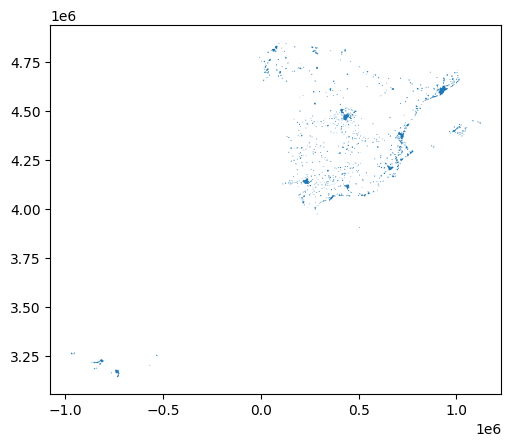

In [ ]:
cities.plot();

#### Lines

Another type of geometric shape that can be used are lines. For example, roads are often described as `LINESTRINGS`.

In [7]:
streets[2:4]["geometry"]

2    LINESTRING (-3.71421 40.48307, -3.71407 40.483...
3    LINESTRING (-3.71660 40.47909, -3.71665 40.479...
Name: geometry, dtype: geometry

And also this type of geometry can be plotted easily.

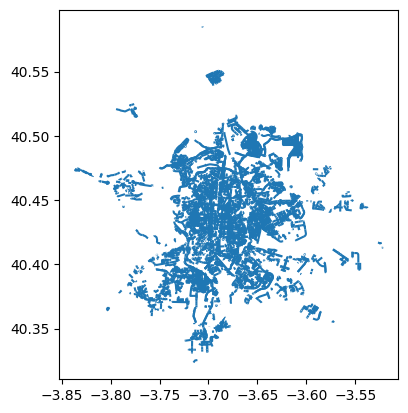

In [ ]:
streets.plot();

#### Points

The final geometric shapes used with geodataframes are `Points`. These are often used in GIS data to represent small objects or points of interest.

Points use a similar approach for quick plotting:

In [13]:
pois[0:1]["geometry"]

element_type  osmid   
node          26808561    POINT (-3.71220 40.42565)
Name: geometry, dtype: geometry

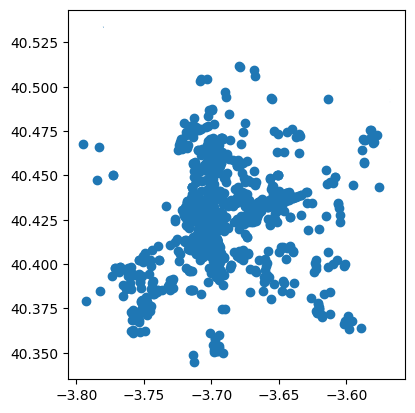

In [ ]:
pois.plot();


## Image Segmentation with Deep Learning

So far, you have completed classification and regression tasks. But especially when we look at images, we are not just interested in the overall result, like what class it is or what revenue we have. Instead, we are interested in more advanced questions. Like where is the class located on the image.

In the computer version, the tasks are roughly divided into the following:
- Image Classification: Classify the image into one of the classes
- Object Detection: Detect the objects in the image and classify them
- Image Segmentation: Classify each pixel of the image into one of the classes
    - Semantic Segmentation: Treats similar objects as one class
    - Instance Segmentation: Treats each object as one class

<img src="https://github.com/GuntherGust/tds2_data/blob/main/images/07/coco_instance_segmentation.jpeg?raw=true" style="width:70% float:center;">

source:https://manipulation.csail.mit.edu/segmentation.html

#### U-Net


One of the most commonly used architectures for image segmentation is the U-Net architecture. It was invented by Ronneberger et al. in 2015 and has been used specifically for biomedical image segmentation.

The U-Net consists of a contracting and an expanding path, which leads to the U-shape and the name U-Net.
The contracting path is used to reduce spatial information and increase feature information, and the expansive path is used to combine features and increase spatial information, which is achieved by using up-convolutional layers and concatenation.

<img src="https://github.com/GuntherGust/tds2_data/blob/main/images/07/u-net-architecture.png?raw=true" style="width:70% float=center;">

In `Fastai` the U-net architecture is implemented in the `unet_learner` function. This allows us, for example, to modify the architecture by choosing an architecture such as `resnet34` or `resnet50` as the backbone of the U-net.

## Spatial Data and Deep Learning

We have already used `geopandas` and `osmnx` to load and manipulate spatial data. But how can we use this data in combination with deep learning?

Therefore, we will now put all the pieces together and create a Data Pipeline to load the data, create a DataBunch and train a U-Net model to segment the houses on aerial images.

### Aerial Images

First we will download and prepare the necessary image dataset. Therefore we will use the Swisstopo platform to download and select our area of interest. Swisstopo is a platform that provides geodata for Switzerland. For us it is interesting because it provides orthophots which are distortion free images of the earth surface.
Images can be selected on this website: <a>https://www.swisstopo.admin.ch/de/geodata/images/ortho/swissimage10.html</a>

<img src="https://github.com/GuntherGust/tds2_data/blob/main/images/07/swisstopo.png?raw=true" style="width:50%" />

For our task, we will select the images from the municipalities of Bern and Zurich. The selection results in a csv that contains the links to the images. We will download the images and store them locally. The csv can be found in this [repository](https://github.com/GuntherGust/tds2_data/tree/main/data) folder.

In [ ]:
import pandas as pd
from PIL import Image
import re # for regex functions

First we will look into our csv file, which we have downloaded from Swisstopo.

In [ ]:
bern_image_urls = pd.read_csv("https://raw.githubusercontent.com/GuntherGust/tds2_data/main/data/Bern.csv",header=None)
bern_image_urls.head()

,0
0,https://data.geo.admin.ch/ch.swisstopo.swissim...
1,https://data.geo.admin.ch/ch.swisstopo.swissim...
2,https://data.geo.admin.ch/ch.swisstopo.swissim...
3,https://data.geo.admin.ch/ch.swisstopo.swissim...
4,https://data.geo.admin.ch/ch.swisstopo.swissim...


In [ ]:
# can be used to download the data to process the notebook faster

import requests
import zipfile
import os

def download_and_unzip(folder_url, output_folder):
    #creates the output folder if it does not exist
    os.makedirs(output_folder, exist_ok=True)
    #downloads the zip file
    response = requests.get(folder_url)
    if response.status_code == 200:
        # if the response is successful, writes the zip file to disk
        zip_filename = os.path.join(output_folder, "downloaded_folder.zip")
        with open(zip_filename, "wb") as zip_file:
            zip_file.write(response.content)
        print("Downloaded the zip file successfully.")
        # unzps the temp zip file
        with zipfile.ZipFile(zip_filename, "r") as zip_ref:
            zip_ref.extractall(output_folder)
        print("Unzipped the folder contents.")
        os.remove(zip_filename)
    else:
        print("Failed to download the zip file. Status code:", response.status_code)


download_and_unzip("https://github.com/GuntherGust/tds2_data/raw/main/data/bern.zip", "./")
download_and_unzip("https://github.com/GuntherGust/tds2_data/raw/main/data/zurich.zip", "./")

Downloaded the zip file successfully.
Unzipped the folder contents.
Downloaded the zip file successfully.
Unzipped the folder contents.


### Downloading and preparing Images

We cann loop now through our Pandas dataframe and download the images. Since our orthophots have an original resolution of 10 cm per pixel we will rescale them that evry pixel is equal to 1 square metre. Therfore we define the method `download_and_rescale_image` which takes the url of the image and the path where the image should be saved.

In [ ]:
import requests
from io import BytesIO
def download_and_rescale_image(url,filename, target_width=1000, target_height=1000):
    try:
# Send an HTTP GET request to the URL to download the image
        response = requests.get(url)
        response.raise_for_status()

        # Open the downloaded image using Pillow
        img = Image.open(BytesIO(response.content))

        # Resize the image to the target dimensions while preserving the aspect ratio
        img.thumbnail((target_width, target_height))

        # Save the resized image
        img.save(filename)
        print("Image downloaded and resized successfully!")
        return False
    except Exception as e:
        print("Error",e)
        return True

Let's run the function for Bern.

In [ ]:
for url in bern_image_urls[0]:
    # Regex to extract the coordinates from the URL, which we use as the filename
    # two groups of 4 digits separated by a dash
    pattern =  r'(\d{4})-(\d{4})'
    X = re.search(pattern,url).group(1)
    Y = re.search(pattern,url).group(2)
    # if the file already exists, skip it
    if os.path.exists(f"bern/images/{X}-{Y}.jpg"):
      continue
    download_and_rescale_image(url,f"bern/images/{X}-{Y}.jpg")

We will do the same for Zurich to evaluate our model on a different area.

In [ ]:
zurich_images_urls = pd.read_csv("https://raw.githubusercontent.com/GuntherGust/tds2_data/main/data/Zurich.csv",header=None)
for url in zurich_images_urls[0]:
    # Regex to extract the coordinates from the URL, which we use as the filename
    # two groups of 4 digits separated by a dash
    pattern =  r'(\d{4})-(\d{4})'
    X = re.search(pattern,url).group(1)
    Y = re.search(pattern,url).group(2)
        # if the file already exists, skip it
    if os.path.exists(f"zurich/images/{X}-{Y}.jpg"):
      continue
    download_and_rescale_image(url,f"zurich/images/{X}-{Y}.jpg")

Now that we have downloaded our images, we need to create some masks for these images that tell us where houses are and where they are not.
To do this, we will use OSM data, which can be downloaded using `osmnx` as explained earlier. For this task, we need to map each pixel of our images to a specific coordinate.
To achieve this, we can use our images' names, which represent the pixel coordinates in the image's bottom-left corner.
But there are two things that we have to consider.

First, not all coordinates are given in the same coordinate System. The coordinate system used for the images is `EPSG:2056`, a coordinate system used in Switzerland. When we want to use OSM data, we need to present our coordinates in the expected coordinate system, which is by default `EPSG:4326`. Therefore, we need to transform our coordinates to `EPSG:4326` before downloading the data.

Second, our names, which were given by `Swisstopo`, are truncated. As a result, we must first transform the filenames before we can utilize them. Rather than using the filename as is, we must add three trailing zeros to both the X and Y coordinates. For instance, `2594_1196` should be transformed to `2594000 1196000`.


<img src="https://github.com/GuntherGust/tds2_data/blob/main/images/07/coordinates.png?raw=true" style="width:50%;" >



Such coordinates can be transformed by using the `pyproj` library.

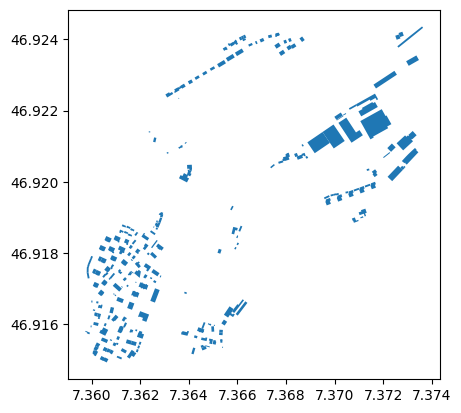

In [14]:
from pyproj import Transformer
transformer = Transformer.from_crs("EPSG:2056","EPSG:4326")
south,west = transformer.transform(2594000,1196000)
north,east = transformer.transform(2595000,1197000)
geo_information = ox.features_from_bbox(north,south,east,west, tags={'building':True})
geo_information.plot();

Next, we'll generate 2D arrays that match the dimensions of our images, measuring 1000 cells in length and width. Each cell within these arrays will be assigned a value of 1 if a house is present at that location and 0 if not. Thus, we can produce masks for our later deep-learning task.

In [ ]:
import numpy as np
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
# A function to create the masks which expects the name of the folder as an input
def create_masks(name):
    for file in os.listdir(f"./{name}/images"):
        # get the coordinates from the filename and add the trailing zeros
        X,Y = file.split(".")[0].split("-")
        X,Y = int(X)*1000,int(Y)*1000
        # If the mask already exists, skip it
        if os.path.exists(f"./{name}/masks_numpy/{int(X/1000)}-{int(Y/1000)}.npy"):
            continue
        # change the coordinate system from EPSG:2056 to EPSG:4326
        transformer = Transformer.from_crs("EPSG:2056","EPSG:4326")
        south,west = transformer.transform(X,Y)
        north,east = transformer.transform(X+1000,Y+1000)
        try:
            # gather the geo information
            geo_information = ox.features_from_bbox(north,south,east,west, tags={'building':True})
        except:
            # if there is no geo information, save an empty mask
            np.save(f"./{name}/masks_numpy/{int(X/1000)}-{int(Y/1000)}.npy",np.zeros((1000,1000)))
            continue
        # create an empty raster
        raster = np.zeros((1000,1000))
        # loop through the raster; An increase of 1 in the x direction is 1 metre, an increase of 1 in the y direction is 1 metre
        # we start in the top left corner and go down and right
        for x_west in range(1000):
            for y_north in range(1000):
                x_west_coordinate = X+x_west
                y_north_coordinate = (Y+1000)-y_north
                small_north,small_west = transformer.transform(x_west_coordinate,y_north_coordinate)
                small_south,small_east = transformer.transform(x_west_coordinate+1,y_north_coordinate-1)
                # create a polygon for each square metre
                square_metre = Polygon([(small_west,small_north),(small_east,small_north),(small_east,small_south),(small_west,small_south)])
                #compare it to the geoinformation and set the value to 1 if it intersects
                if geo_information.intersects(square_metre).any():
                    raster[y_north,x_west] = 1
        np.save(f"./{name}/masks_numpy/{X/1000}-{Y/1000}.npy",raster)
create_masks("bern")
create_masks("zurich")

Let us look at our masks when we place them over the images. To do this, we plot the image and plot the mask over it. Therefore, we add opacity to the mask so that we can see the image through the mask.

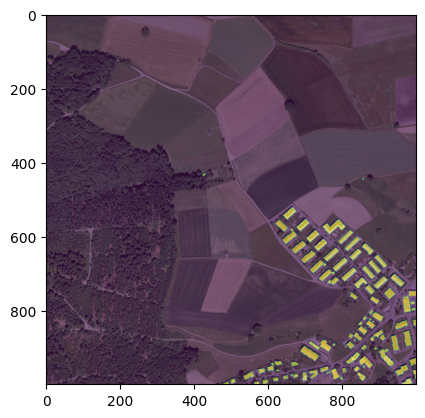

In [ ]:
image = np.array(Image.open("bern/images/2594-1197.jpg"))
mask = np.load("bern/masks_numpy/2594-1197.npy")
plt.imshow(image)
plt.imshow(mask,alpha=0.5)
plt.plot();

Finally let us split our images and masks into four parts. To increase our dataset. We would not have had to split them, but since we will only be predicting smaller images later, it makes sense to increase the training and especially the test quantity in this way.

In [ ]:
for folder in ["bern","zurich"]:
  #loop through both folders
  for file in os.listdir(f"/content/{folder}/images"):
    pattern =  r'(\d{4})-(\d{4})'
    # Extract X and Y and set it at the beginnign to the left middle of the image
    X = int(re.search(pattern,file).group(1))*1000
    Y = int(re.search(pattern,file).group(2))*1000 +500
    # load the image and the mask file
    img = Image.open(f"/content/{folder}/images/"+file)
    mask = np.load(f"/content/{folder}/masks_numpy/"+file.replace(".jpg",".npy"))
    for x in range(2):
      for y in range(2):
        #crop image and mask into a quater of the original size
        crop_box = (0+(x*500),0+(y*500), 500+(x*500), 500+(y*500))
        cropped_image = img.crop(crop_box)
        cropped_mask = mask[0+(y*500):500+(y*500),0+(x*500):500+(x*500)]
        #save the cropped image and mask
        np.save(f"/content/{folder}/masks_numpy/{X+(x*500)}-{Y-(y*500)}",cropped_mask)
        cropped_image.save(f"/content/{folder}/images/{X+(x*500)}-{Y-(y*500)}.jpg")
    #remove the original image and mask
    os.remove(f"/content/{folder}/images/"+file)
    os.remove(f"/content/{folder}/masks_numpy/"+file.replace(".jpg",".npy"))

## Image Segmentation with Fastai

**Restart your Notebook! Because of interdependencies between osmnx, fastai and IPython**


In [1]:
from fastai.vision.all import *

First we implement functions that will tell the DataBlock where it can find the images and where it can find the masks.

In [2]:
def mask_function(name):
    return np.load(str(name).replace("images","masks_numpy").replace("jpg","npy"))

In [3]:
def get_images(name):
  return get_image_files("./bern/images")+get_image_files("./zurich/images")

Next we will define the DataBlock with the following arguemnts:
- blocks: The type of data that we want to load. In our case we want to load images and masks
- get_items: The function that tells the DataBlock where it can find the images.
- get_y: The function that tells the DataBlock where it can find the masks.
- splitter: The function that tells the DataBlock how to split the data into train and validation set.
- item_tfms: The transformations that should be applied to the images (before it is loaded to the GPU).
- batch_tfms: The transformations that should be applied to the batches (executed on the GPU).

In [4]:
satellite_block = DataBlock(blocks = (ImageBlock, MaskBlock(codes = ["background","house"])),
                 get_items=get_images,
                 splitter=GrandparentSplitter(train_name='bern', valid_name='zurich'),
                 get_y=mask_function,
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=256, max_lighting=0.3)
)

Let's create our dataloader and look at a batch.

In [5]:
dataloader = satellite_block.dataloaders("./",bs=16)

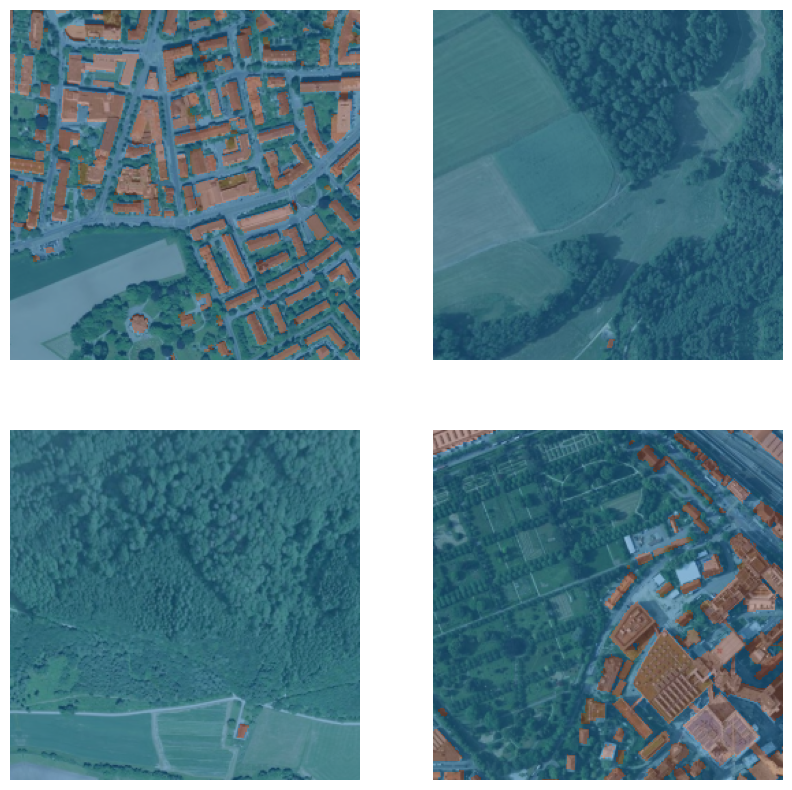

In [ ]:
dataloader.show_batch(max_n=4,figsize=(10,10))

Finally, we define the unet_learner. To do this we need to pass our dataloader and choose an architecture. Here we will use a resnet34 as the backbone of our U-net. Finally, to evaluate our model we need to choose a metric. Therefore we will choose the `Dice Score`as our evaluation metric.
The dice score describes the overlap between the predicted and the actual mask. Thus, a higher Dice score represents a better prediction result.

**Dice Score**
$$D = {2 * |X ∩ Y| \over |X| + |Y|}$$

In [6]:
learner = unet_learner(dataloader,resnet34,metrics=Dice)

After defining our deep learning model, we need to find an appropriate learning rate. To find a learning rate, we will again use the **lr_find()** method.

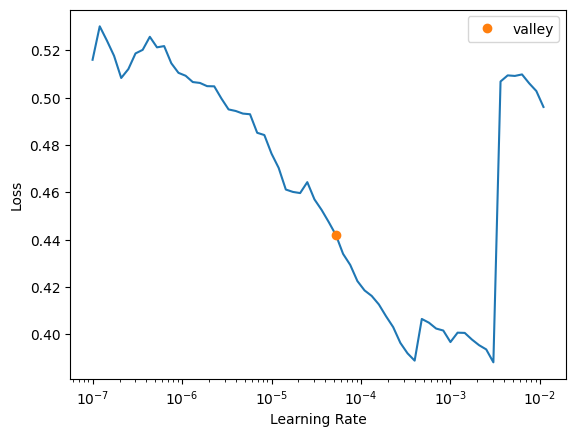

In [ ]:
lr = learner.lr_find()

After we have found our learning rate, we will train our model. We will use two callback functions to do this. First the `EarlyStoppingCallback` which will stop the training if our model is not improving anymore. And second the `SaveModelCallback` which will save the model every time we have improved it.

In [ ]:
learner.fit_one_cycle(20, lr_max=lr.valley, cbs=[EarlyStoppingCallback(monitor='dice', min_delta=0.01, patience=5, comp=np.greater),
                                           SaveModelCallback(monitor='dice', min_delta=0.01, comp=np.greater, fname='best_frozen_model')])

epoch,train_loss,valid_loss,dice,time
0,0.430133,0.619212,0.000251,00:16
1,0.389985,0.520514,0.000394,00:15
2,0.338560,0.430945,0.093589,00:15
3,0.290951,0.393394,0.378384,00:15
4,0.262148,0.379525,0.279572,00:15
5,0.240299,0.344201,0.565870,00:15
6,0.219401,0.336138,0.540192,00:15
7,0.203218,0.356159,0.651186,00:15
8,0.192350,0.313187,0.613562,00:15
9,0.180357,0.308647,0.652648,00:15


Better model found at epoch 0 with dice value: 0.00025082563437983364.
Better model found at epoch 2 with dice value: 0.093588717467502.
Better model found at epoch 3 with dice value: 0.37838416617934123.
Better model found at epoch 5 with dice value: 0.5658699353547949.
Better model found at epoch 7 with dice value: 0.651185957808445.
Better model found at epoch 12 with dice value: 0.6775110351177973.
No improvement since epoch 12: early stopping


Next, we will load our best model and unfreeze it. We will then repeat the training steps with our model.

In [14]:
learner = learner.load('best_frozen_model')
learner.unfreeze()

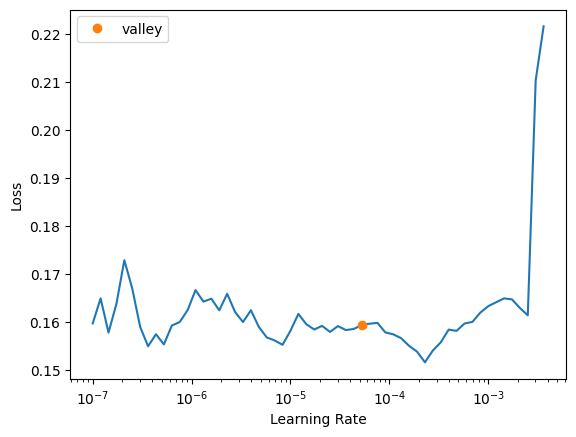

In [10]:
lr = learner.lr_find()

In [15]:
learner.fit_one_cycle(
    20, lr_max=slice(lr.valley/10,lr.valley*10),
    cbs=[EarlyStoppingCallback(monitor='dice', min_delta=0.01, patience=5, comp=np.greater),
         SaveModelCallback(monitor='dice', comp=np.greater, fname='best_model')]
         )

epoch,train_loss,valid_loss,dice,time
0,0.168751,0.313755,0.663693,00:16
1,0.166553,0.326016,0.691826,00:16
2,0.174961,0.309373,0.635311,00:16
3,0.173381,0.338176,0.505838,00:16
4,0.169797,0.340829,0.431737,00:15
5,0.160897,0.282501,0.699180,00:16
6,0.158998,0.281568,0.709683,00:16
7,0.153794,0.277995,0.730502,00:16
8,0.149334,0.264582,0.679821,00:16
9,0.144411,0.271868,0.696917,00:16


Better model found at epoch 0 with dice value: 0.663692975645312.
Better model found at epoch 1 with dice value: 0.6918258069141222.
Better model found at epoch 5 with dice value: 0.6991804972965581.
Better model found at epoch 6 with dice value: 0.7096825609248152.
Better model found at epoch 7 with dice value: 0.7305021831532377.
Better model found at epoch 12 with dice value: 0.7436016476497311.
Better model found at epoch 13 with dice value: 0.7524395411528879.
No improvement since epoch 12: early stopping


In [16]:
learner = learner.load("best_model")

Now finally let us evaluate our model on our test dataset.

In [17]:
print("in-sample performance: {}".format(np.array(learner.validate(ds_idx=0)[1]))) # Dice Score

in-sample performance: 0.7605717651503343


In [18]:
print("out-of-sample performance: {}".format(np.array(learner.validate(ds_idx=1)[1]))) # Dice Score

out-of-sample performance: 0.7524395411528879


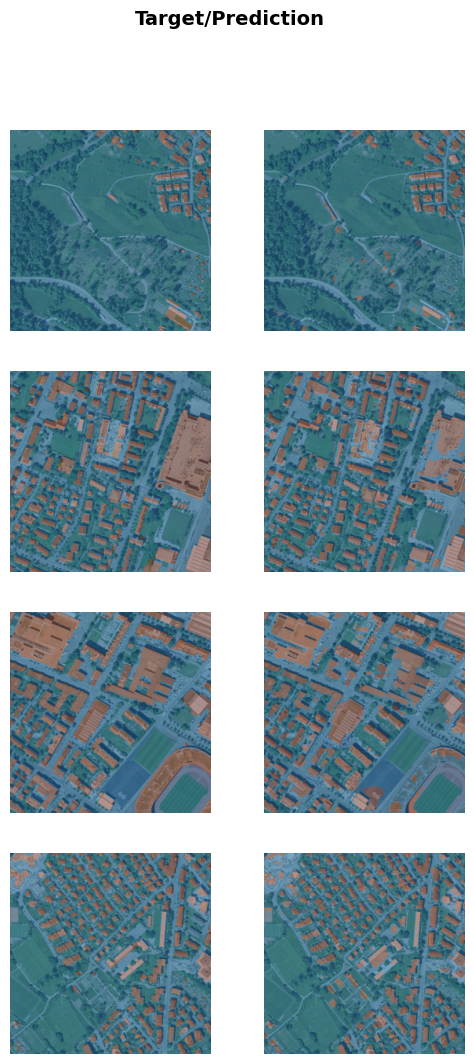

In [19]:
learner.show_results(max_n=4)

## Transform the output back to GIS format.


First, we will load an image and slice it directly to the correct size so that we know which pixel belongs to which coordinate. This saves us the conversion that would be necessary due to the preprocessing used.

In [20]:
from PIL import Image
from shapely import Polygon
file_name = "/content/zurich/images/2679000-1247000.jpg"
img = Image.open(file_name)
# Resize the image to the target dimension
crop_box = (0,0, 256, 256)  # (left, upper, right, lower)
cropped_image = img.crop(crop_box)
prediction = learner.predict(cropped_image)
prediction = prediction[1]
# Find the X any Y coordinates as before
pattern =  r'(\d{7})-(\d{7})'
X = int(re.search(pattern,file_name).group(1))
Y = int(re.search(pattern,file_name).group(2))
# X and Y are located at the bottom left but we have cuted out the top left area
X = X
Y = Y + 500
# looping through the 2D-Array
houses = []
for x in range(256):
  for y in range(256):
    if prediction[y][x] == 1:
      houses.append({"house":True,"geometry":Polygon([(X+x,Y-y),(X+(x+1),Y-y),(X+(x+1),Y-(y+1)),(X+x,Y-(y+1))])})

Now we want to put the polygons into a geodataframe and combine them with other GIS data. In particular, we will combine our house segmentations with street data from OSM.

In [21]:
import geopandas as gpd
import osmnx as ox
from pyproj import Transformer
# create the GeodataFrame for our masks
masks = gpd.GeoDataFrame(houses,crs="EPSG:2056")
transformer = Transformer.from_crs("EPSG:2056","EPSG:4326")
#get the bounding coordinates
south,west = transformer.transform(X,Y-256)
north,east = transformer.transform(X+256,Y)
# download the osm data
streets = ox.features_from_bbox(north,south,east,west,{"highway":True})
# transform the masks coordinates to the EPSG coordinate system
masks = masks.to_crs("EPSG:4326")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


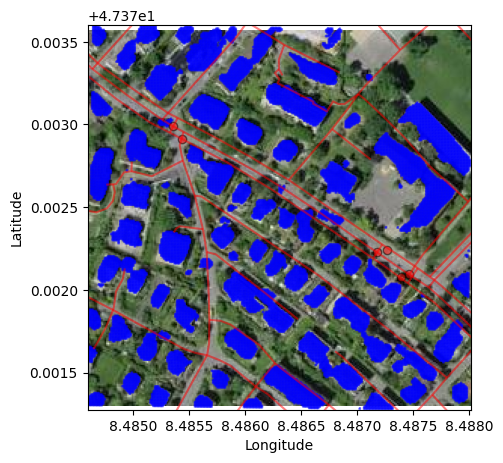

In [22]:
fig, ax = plt.subplots(figsize=(5, 5))
minx, miny, maxx, maxy = masks.total_bounds
#plot the image as background
ax.imshow(cropped_image, extent=[west, east, south,north])
# Plot each GeoDataFrame
masks.plot(ax=ax, color='blue', edgecolor='blue',alpha=0.5)
streets.plot(ax=ax, color='red', edgecolor='black',alpha=0.5)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
bounds = masks.total_bounds
ax.set_xlim(bounds[0], bounds[2])
ax.set_ylim(bounds[1], bounds[3])
plt.show()

## Conclusion

Today we learned how we can use spatial data. We learned how to load, manipulate and visualize spatial data.Furthermore we also learned how to use deep learning to segment images. Finally, we learned how to combine spatial data and deep learning to segment houses on aerial images. Therfore you have now seen the tools like `osmnx`, `geopandas`  and `pyproj` that allows you to set up a data pipeline for spatial data. Furthermore by using `fastai` you are now able to handle image segmentation tasks.